In [219]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

full_train_data = pd.read_csv('data/train.csv')
full_test_data = pd.read_csv('data/submission_data.csv')
target = 'hoursdiff_log'

for col in full_train_data.columns:
    if full_train_data.loc[:, col].isna().sum()>0:
        print('nan in:', col)
else:
    print('None nan\n')
    

train_data = full_train_data.copy()
train_data = train_data.loc[:, train_data.columns.drop(['hoursdiff', 'orderid'])]

full_train_data.info()

None nan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535862 entries, 0 to 535861
Columns: 147 entries, orderid to hoursdiff_log
dtypes: float64(3), int64(144)
memory usage: 601.0 MB


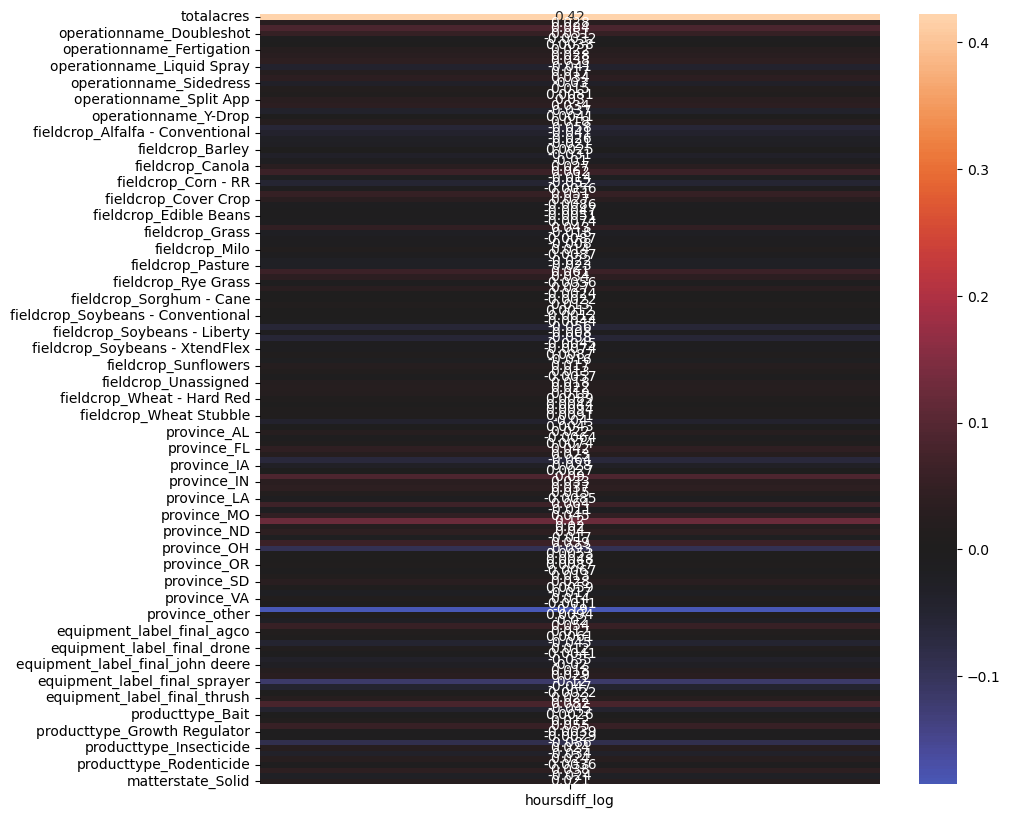

In [220]:
df_cor = train_data.corr()
df_cor = pd.DataFrame(df_cor.loc[target, df_cor.columns.drop(target)])
df_cor = df_cor[abs(df_cor.loc[:, 'hoursdiff_log'])>=0.001]
plt.figure(figsize=(10, 10))
sns.heatmap(df_cor, center=0, annot=True)#Chaddoсk heatmap
plt.show()

featured_columns = df_cor.index.to_list()

featured_train_data = train_data.loc[:, featured_columns]
target_train_data = train_data.loc[:, target]

In [225]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(featured_train_data, target_train_data, test_size=0.125, random_state=42)

skf

In [222]:
from sklearn.linear_model import LinearRegression

LinearRegression_model = LinearRegression().fit(X_train, y_train)
LinearRegression_predict = LinearRegression_model.predict(X_test)
LinearRegression_train_predict = LinearRegression_model.predict(X_train)

print('RMSE LinearRegression:\n',
      'train:', mean_squared_error(y_train, LinearRegression_train_predict), '\n',
      'test:', mean_squared_error(y_test, LinearRegression_predict))

RMSE LinearRegression:
 train: 0.6038266681315274 
 test: 0.608022835220964


In [223]:
from xgboost import XGBRegressor


XGBRegressor_model = XGBRegressor(random_state=42).fit(X_train, y_train)
XGBRegressor_predict = XGBRegressor_model.predict(X_test)
XGBRegressor_train_predict = XGBRegressor_model.predict(X_train)

print('RMSE XGBRegressor:\n',
      'train:', mean_squared_error(y_train, XGBRegressor_train_predict), '\n',
      'test:', mean_squared_error(y_test, XGBRegressor_predict))

RMSE XGBRegressor:
 train: 0.4444678056705185 
 test: 0.4548304318174476


In [224]:
full_test_data['Predicted'] = XGBRegressor_model.predict(full_test_data.loc[:, featured_columns])
full_test_data.loc[:, ['Id', 'Predicted']].to_csv('submission.csv', index=False)